 Consider the artificial data created by x=np.linspace(0,1,101) and $y = 1+ x + x* np.random.random(len(x))$. We want to fit with a function $\hat{y} = \alpha_1 x + \alpha_2$. Plot the data along with least squares regression

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# Create the data
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

# Assemble the matrix A
A = np.vstack([x, np.ones(len(x))]).T
#print(A.T)
# Convert y to a column vector, ensuring it has the correct shape
y = y[:, np.newaxis]  # This creates a (101, 1) shaped array

# Perform least squares regression
alpha = np.dot(     np.dot(np.linalg.inv(np.dot(A.T, A)), A.T)    , y)
#                             (𝐴𝑇𝐴)^−1 . 𝐴𝑇
  

# Print the coefficients
print("Coefficients (alpha):", alpha.flatten())


Coefficients (alpha): [1.46849408 0.99003037]


In [2]:
alpha

array([[1.46849408],
       [0.99003037]])

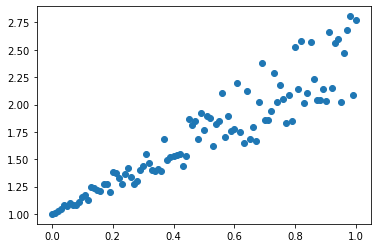

In [3]:
plt.plot(x, y, 'o')
plt.show()

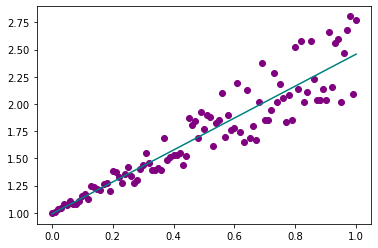

In [4]:
plt.plot(x,y,'o', color="purple")
plt.plot(x,alpha[0]*x+alpha[1], color="teal")

## Using Pseudo inverse ##
We said that $ (A^T A)^{-1} A^T $ is called the pseudo inverse. We can use the pinv function in numpy to calculate it directly:

In [5]:
# Using Pseudo inverse to avoid long calculation:
pinv = np.linalg.pinv(A)
alpha = np.dot(pinv,y)
alpha

array([[1.46849408],
       [0.99003037]])

## Using NUMPY.LINALG.LSTQ

In [6]:
# Using numpy package to find coefficients in the form alpha[0] + (x * alpha[1])
alpha = np.linalg.lstsq(A,y,rcond=None)[0]
alpha

array([[1.46849408],
       [0.99003037]])

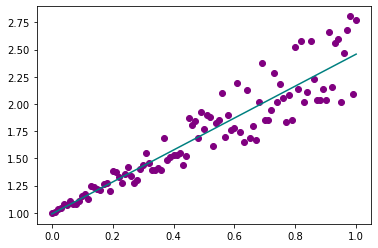

In [7]:
plt.plot(x,y,'o', color="purple")
plt.plot(x,alpha[0]*x+alpha[1], color="teal")

In [8]:
# Using np.polyfit()

/var/folders/b7/w_x6xn1j7qs2frhg7ptf7r9m0000gn/T/ipykernel_48821/1381060485.py:12: RankWarning: Polyfit may be poorly conditioned
  y_est = np.polyfit(x_d, y_d, i) # polyfit( x-coordinates, y-coordinates, order of polynomial)


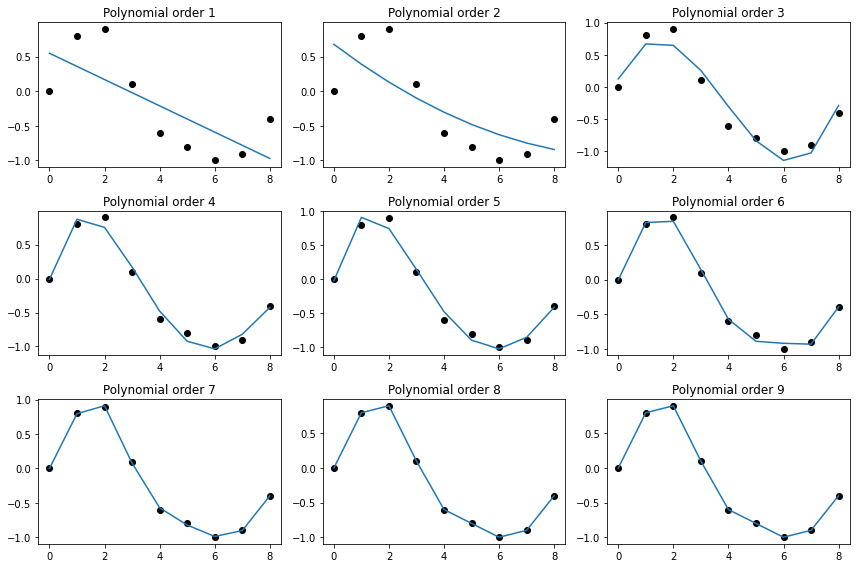

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x_d = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
y_d = np.array([0, 0.8, 0.9, 0.1, -0.6, -0.8, -1, -0.9, -0.4])


plt.figure(figsize = (12, 8))
for i in range(1, 10):

    # get the polynomial coefficients
    y_est = np.polyfit(x_d, y_d, i) # polyfit( x-coordinates, y-coordinates, order of polynomial)
    plt.subplot(3,3,i)
    plt.plot(x_d, y_d, 'ok')
    # evaluate the values for a polynomial
    plt.plot(x_d, np.polyval(y_est, x_d))
    plt.title(f'Polynomial order {i}')

plt.tight_layout()
plt.show()


In [10]:
# Least squares linear regression

[ 3.01134092 -1.99464913  0.49372665]


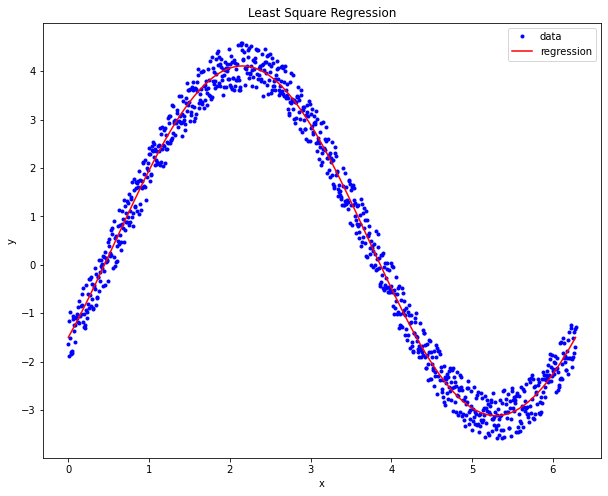

In [11]:
import numpy as np
import matplotlib.pyplot as plt


def my_lin_regression(f, x, y):
    # Add the column for the constant term (bias)
    basis_columns = [func(x) for func in f] + [np.ones_like(x)]

    # Stack the columns horizontally to form the design matrix A
    A = np.vstack(basis_columns).T

    # Solve the normal equation A.T * A * beta = A.T * y for beta
    beta, residuals, rank, s = np.linalg.lstsq(A, y, rcond=None)

    return beta


# Generating the data
x = np.linspace(0, 2*np.pi, 1000)
y = 3*np.sin(x) - 2*np.cos(x) + np.random.random(len(x))

# Define the basis functions
f = [np.sin, np.cos]

# Get the coefficients
beta = my_lin_regression(f, x, y)
print(beta)

# Plot the results
plt.figure(figsize=(10, 8))
plt.plot(x, y, 'b.', label='data')
plt.plot(x, beta[0]*np.sin(x) + beta[1]*np.cos(x) + beta[2], 'r', label='regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Square Regression')
plt.legend()
plt.show()


## Using OPTIMIZE.CURVE_FIT from SCIPY

This is very powerful which can be also used for nonlinear functions. Here we do not the matrix A or to turn y into a column vector

In [13]:
from scipy import optimize

x = np.linspace(0,1,101)
y= 1+ x + x* np.random.random(len(x))


def func(x, a, b):
    y = a *x + b
    return y

alpha = optimize.curve_fit(func, xdata=x, ydata=y)

## Fitting nonlinear function

alpha=0.125139136431036, beta=0.27892866757733054


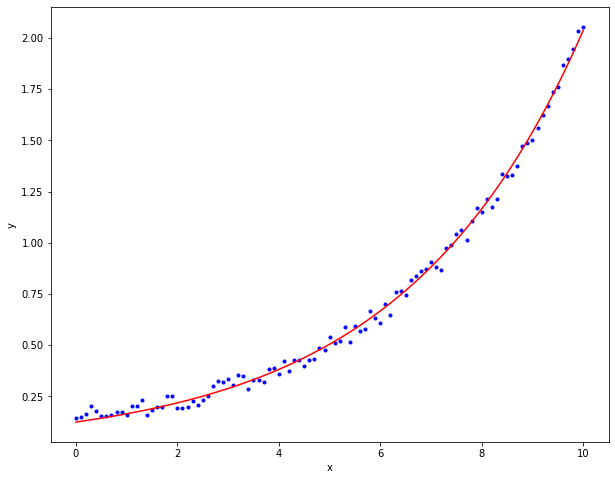

In [14]:
x = np.linspace(0, 10, 101)
y = 0.1*np.exp(0.3*x) + 0.1*np.random.random(len(x))


# let's define the function form for the exponential case
def func(x, a, b):
    y = a*np.exp(b*x)
    return y

alpha, beta = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(f'alpha={alpha}, beta={beta}')

plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha*np.exp(beta*x), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Polynomial regression

We can also use polynomials and least squares to fit a nonlinear function. Previously, we had our functions all in linear form, that is, 𝑦=𝑎𝑥+𝑏
But polynomials are functions with the following form:
$$
𝑓(𝑥)=𝑎_𝑛𝑥_𝑛+𝑎_{𝑛−1}𝑥_{𝑛−1}+⋯+𝑎_2𝑥_2+𝑎_1𝑥_1+𝑎_0
$$

where $𝑎_𝑛$, are the real number coefficients, and 𝑛, a nonnegative integer, is the order or degree of the polynomial. If we have a set of data points, we can use different orders of polynomials to fit it!

The coefficients of the polynomials can be estimated using the least squares method as before, that is, minimizing the error between the real data and the polynomial fitting results.

In Python, we can use **numpy.polyfit** to obtain the coefficients of different order polynomials with the least squares. With the coefficients, we then can use **numpy.polyval** to get specific values for the given coefficients. Let us see an example how to perform this in Python.

/var/folders/b7/w_x6xn1j7qs2frhg7ptf7r9m0000gn/T/ipykernel_48821/1381060485.py:12: RankWarning: Polyfit may be poorly conditioned
  y_est = np.polyfit(x_d, y_d, i) # polyfit( x-coordinates, y-coordinates, order of polynomial)


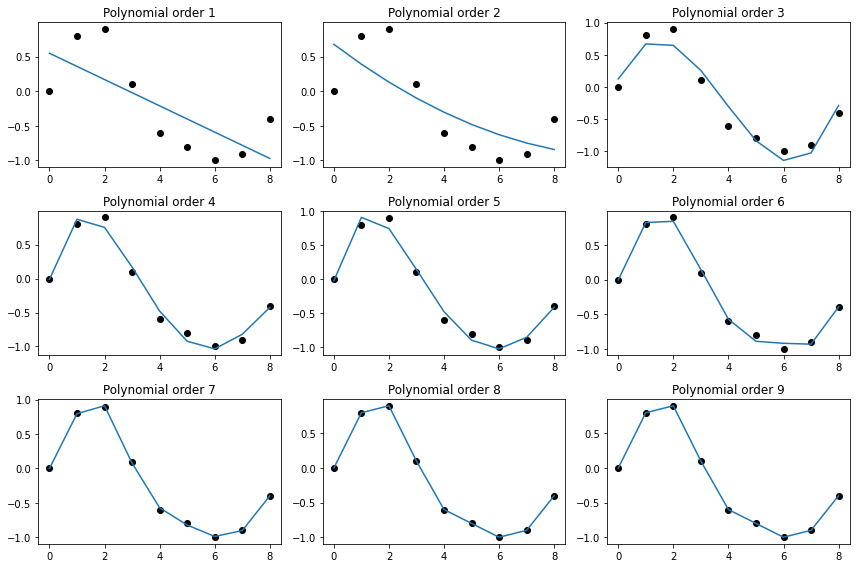

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x_d = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
y_d = np.array([0, 0.8, 0.9, 0.1, -0.6, -0.8, -1, -0.9, -0.4])


plt.figure(figsize = (12, 8))
for i in range(1, 10):

    # get the polynomial coefficients
    y_est = np.polyfit(x_d, y_d, i) # polyfit( x-coordinates, y-coordinates, order of polynomial)
    plt.subplot(3,3,i)
    plt.plot(x_d, y_d, 'ok')
    # evaluate the values for a polynomial
    plt.plot(x_d, np.polyval(y_est, x_d))
    plt.title(f'Polynomial order {i}')

plt.tight_layout()
plt.show()


[ 2.98071978 -1.99578731  0.48846126]


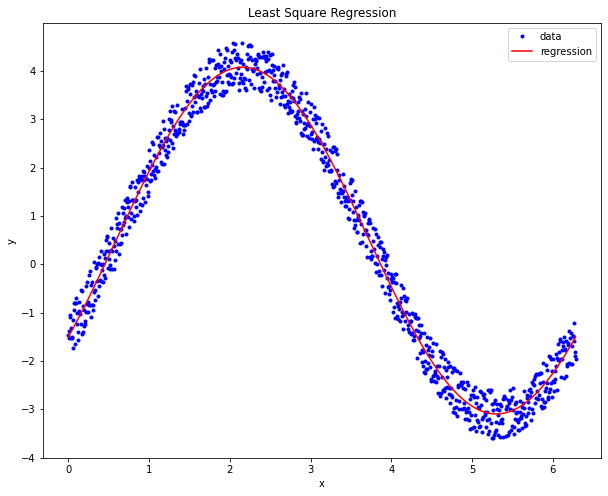

In [16]:
import numpy as np
import matplotlib.pyplot as plt


def my_lin_regression(f, x, y):
    # Add the column for the constant term (bias)
    basis_columns = [func(x) for func in f] + [np.ones_like(x)]

    # Stack the columns horizontally to form the design matrix A
    A = np.vstack(basis_columns).T

    # Solve the normal equation A.T * A * beta = A.T * y for beta
    beta, residuals, rank, s = np.linalg.lstsq(A, y, rcond=None)

    return beta


# Generating the data
x = np.linspace(0, 2*np.pi, 1000)
y = 3*np.sin(x) - 2*np.cos(x) + np.random.random(len(x))

# Define the basis functions
f = [np.sin, np.cos]

# Get the coefficients
beta = my_lin_regression(f, x, y)
print(beta)

# Plot the results
plt.figure(figsize=(10, 8))
plt.plot(x, y, 'b.', label='data')
plt.plot(x, beta[0]*np.sin(x) + beta[1]*np.cos(x) + beta[2], 'r', label='regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Square Regression')
plt.legend()
plt.show()


## Gradient descent

Optimal x: 2.9999995063486327
Minimum value of f(x): 4.000000000000243


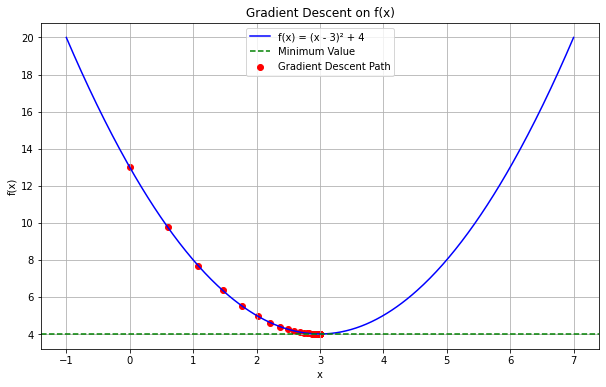

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def f(x):
    return (x - 3)**2 + 4

def df(x):
    return 2 * (x - 3)  # Derivative of the function

# Gradient descent parameters
x_start = 0.0  # Starting point
learning_rate = 0.1  # Step size
tolerance = 1e-6  # Stopping criterion
max_iterations = 100  # Maximum number of iterations

# Gradient descent algorithm
x = x_start
iteration = 0
x_history = [x]

while iteration < max_iterations:
    x -= learning_rate * df(x)  # Update x using the gradient
    x_history.append(x)

    # Stop if the change is less than the tolerance
    if abs(df(x)) < tolerance:
        break

    iteration += 1

# Output the result
print(f"Optimal x: {x}")
print(f"Minimum value of f(x): {f(x)}")

# Plotting the function and the descent path
x_vals = np.linspace(-1, 7, 400)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x) = (x - 3)² + 4', color='blue')
plt.scatter(x_history, f(np.array(x_history)), color='red', label='Gradient Descent Path')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent on f(x)')
plt.axhline(y=min(f(x_vals)), color='green', linestyle='--', label='Minimum Value')
plt.legend()
plt.grid()
plt.show()


## Gauss-Newton method
https://en.wikipedia.org/wiki/Gauss%E2%80%93Newton_algorithm#Solving_overdetermined_systems_of_equations

$$
P^{k+1} = P^k - (J^TJ)^{-1}J^T r
$$

In [18]:
import numpy as np
import matplotlib.pyplot as plot

#Our data
X=np.array([0.038,0.194,0.425,0.626,1.253,2.5,3.74])
Y=np.array([0.05,0.127,0.094,0.2122,0.2729,0.2665,0.3317])

# We need:
# Y =C1*X/C2+X
# r = Y - C1*X/C2+X
# we also need to calculate the Jacobian of r w.r.t C1 and C2:
#dr/dC1=-(X/C2+X)
#dr/dC2 = (C1X/(C2+x)**2) should be the symbol for part. derivatives!

#Initial guesses for C1 and C2
P0=[1,1]
#Initialise the Jacobian matrix

J = np.zeros([len(X),len(P0)])
Iter = 0

while True:
    Iter += 1
    j1 = -(X/(P0[1]+X))
    j2 = (P0[0]*X)/((P0[1]+X)**2)
    J[:,0] = j1
    J[:,1] = j2
    r = Y - (P0[0]*X)/(P0[1]+X)
    t1= np.linalg.inv(np.dot(J.T,J))
    t2 = np.dot(t1,J.T)
    t3=np.dot(t2,r)

    P1 = P0 - t3
    t4=abs(P1-P0)
    if max(t4) <= 1e-6:
        break
    P0 = P1

C1 = float(P0[0])
C2 = float(P0[1])

print(f'The constants are \nC1 = {C1}\nC2: {C2} \nIterations = {Iter}')



The constants are 
C1 = 0.36183683873996686
C2: 0.5562662673250182 
Iterations = 8


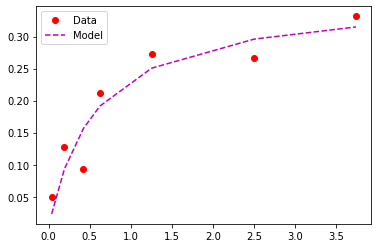

0.8811460872951851


In [19]:
plt.plot(X,Y,'ro',label="Data")
pred=(C1*X)/(C2+X)
plt.plot(X,pred,'m--',label="Model")
plt.legend()
plt.show()

# Use R^2 to know how close the predicted values are to the data
ss_fit=np.sum((Y-pred)**2)
ss_mean=np.sum((Y-np.mean(Y))**2)
r=1-(ss_fit/ss_mean)
print(r)

## The Levenberg-Marquardt algorithm
combines  the steepest descent (far from the optimal values) and the Gauss-Newton methods (close to the optimal value), taking advantage of the high speed of the Gauss-Newton algorithm and the high stability of the steepest descent method.
https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm

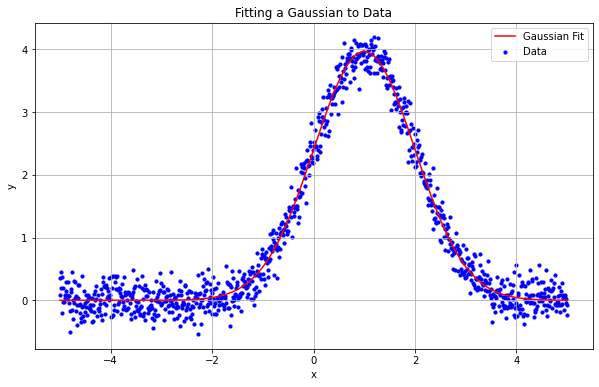

Fitted parameters:
Amplitude: 3.964675550478795
Mean: 1.000673922689308
Standard Deviation: 0.9986895473064866


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generate Gaussian data with noise
np.random.seed(0)  # Set a seed for reproducibility
x = np.linspace(-5, 5, 1000)
# Parameters of the Gaussian: amplitude, mean, standard deviation
y = 4 * np.exp(-(x - 1)**2 / (2 * 1**2)) + np.random.normal(0, 0.2, x.shape)

# Define the Gaussian function
def gaussian(x, amplitude, mean, sigma):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

# Fit the Gaussian model to the data using curve_fit
initial_guess = [1, 0, 1]  # initial values: amplitude, mean, standard deviation
params, covariance = curve_fit(gaussian, x, y, p0=initial_guess)

# Extract the parameters
amplitude_fit, mean_fit, sigma_fit = params

# Plotting the data and the fitting curve
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data', color='blue', s=10)
plt.plot(x, gaussian(x, *params), label='Gaussian Fit', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitting a Gaussian to Data')
plt.legend()
plt.grid()
plt.show()

# Print the fitted parameters
print("Fitted parameters:")
print(f"Amplitude: {amplitude_fit}")
print(f"Mean: {mean_fit}")
print(f"Standard Deviation: {sigma_fit}")


Fitted parameters: a = 2.207199929794479, b = -0.09546502679840452, c = 1.563083956354768


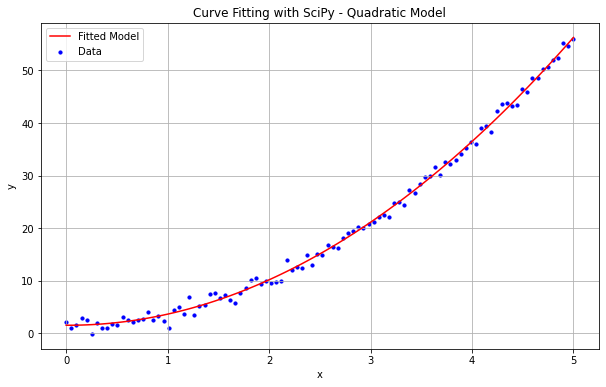

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generate synthetic data
np.random.seed(0)
x_data = np.linspace(0, 5, 100)  # Data ranging from 0 to 5

a_true = 2.0
b_true = 1.0
c_true = 0.5
# y = ax^2 + bx + c + noise
y_data = a_true * x_data**2 + b_true * x_data + c_true + np.random.normal(0, 1.0, x_data.shape)

# Define the polynomial model function
def model(x, a, b, c):
    return a * x**2 + b * x + c

# Fit the model using curve_fit
initial_params = [1.0, 1.0, 1.0]  # Initial guesses for a, b, c
fitted_params, covariance = curve_fit(model, x_data, y_data, p0=initial_params)

# Print the fitted parameters
print(f"Fitted parameters: a = {fitted_params[0]}, b = {fitted_params[1]}, c = {fitted_params[2]}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data', color='blue', s=10)
plt.plot(x_data, model(x_data, *fitted_params), label='Fitted Model', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curve Fitting with SciPy - Quadratic Model')
plt.legend()
plt.grid()
plt.show()


The constants are 
C1 = 2.0404943865241885
C2: 0.8554831671269174 
Iterations = 2


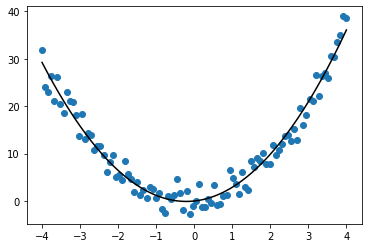

In [22]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-4,4,100)
a_true=2
b_true=1
y=a_true*x**2+b_true*x + (np.random.normal(0,2,len(x)))

#ypred=beta1*x*+2+beta2*x
#dy/beat1=-x**2
#dy/beta2=-x


#Initial guesses for beta1 and beta2
beta0=[1,1]
#Initialise the Jacobian matrix

J = np.zeros([len(x),len(beta0)])
Iter = 0

while True:
    Iter += 1
    j1 = -x**2
    j2 = -x
    J[:,0] = j1
    J[:,1] = j2
    r = y - (beta0[0] * x**2 + beta0[1] * x)  # Correct it here
    t1= np.linalg.inv(np.dot(J.T,J))
    t2 = np.dot(t1,J.T)
    t3=np.dot(t2,r)

    beta1 = beta0 - t3
    t4=abs(beta1-beta0)
    if max(t4) <= 1e-6:
        break
    beta0 = beta1

beta1 = float(beta0[0])
beta2 = float(beta0[1])

print(f'The constants are \nC1 = {beta1}\nC2: {beta2} \nIterations = {Iter}')

ypred=(beta1*x**2)+(beta2*x)
plt.plot(x,y,'o')
plt.plot(x,ypred,'k-')
plt.show()